In [ ]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Modélisation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Charger les données 
df = pd.read_csv("Dataset.csv")


# Définir la variable cible y et les variables explicatives X
y = df["duration"]
X = df.drop(columns=["duration"])



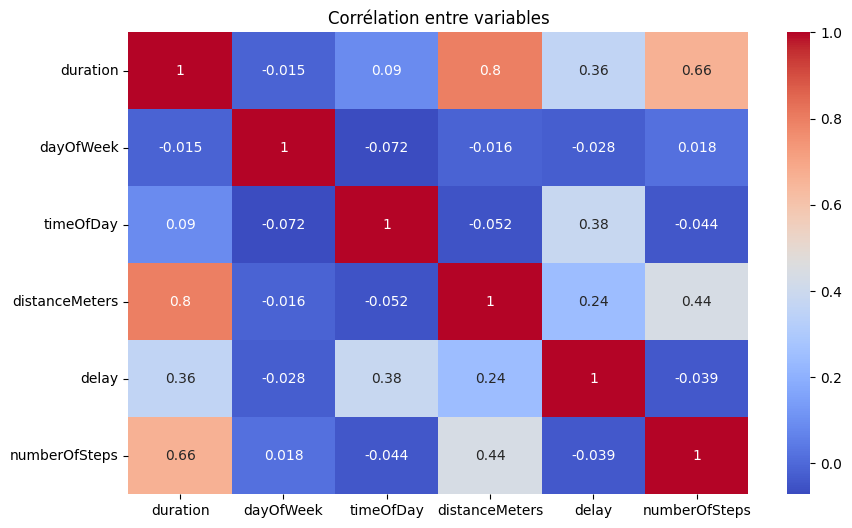

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre variables")
plt.show()


In [64]:
from sklearn.feature_selection import f_regression
import pandas as pd

# Définir X et y
X = df.drop(columns=["duration"])
y = df["duration"]

# Calcul des statistiques F et des p-values
f_values, p_values = f_regression(X, y)

# Créer un tableau récapitulatif formaté
pval_table = pd.DataFrame(
    {"Variable": X.columns, "F_value": f_values, "P_value": p_values}
)

# Formatage lisible
pval_table["F_value"] = pval_table["F_value"].map("{:.2f}".format)
pval_table["P_value"] = pval_table["P_value"].apply(
    lambda x: f"{x:.2e}" if x < 0.01 else f"{x:.3f}"
)

# Trier par significativité
pval_table = pval_table.sort_values(by="P_value")

# Afficher le tableau
print(pval_table)


         Variable  F_value    P_value
1       timeOfDay     6.01      0.014
0       dayOfWeek     0.16      0.694
3           delay   111.53   2.23e-24
4   numberOfSteps   573.61   2.88e-94
2  distanceMeters  1277.12  3.25e-163


In [65]:
X = df.drop(columns=["duration", "dayOfWeek"])
y = df["duration"]


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
y_pred = model.predict(X_test)


In [69]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score :", round(r2, 3))
print("RMSE :", round(rmse, 2))


R² score : 0.833
RMSE : 229.14


In [ ]:
from sklearn.linear_model import LinearRegression

# Entraînement du modèle
model = LinearRegression()
model.fit(X, y)

# Récupérer l’intercept et les coefficients
intercept = model.intercept_
coefficients = model.coef_

# Générer la formule
formula = f"duration = {intercept:.2f}"
for var, coef in zip(X.columns, coefficients):
    sign = "+" if coef >= 0 else "-"
    formula += f" {sign} {abs(coef):.2f}*{var}"

# Afficher la formule
print("Formule de la régression linéaire :\n")
print(formula)


Formule de la régression linéaire :

duration = 201.63 + 7.28*timeOfDay + 0.07*distanceMeters + 0.67*delay + 38.47*numberOfSteps


In [ ]:
%pip install torch

import torch
import torch.nn as nn

# Créer un modèle de régression linéaire PyTorch équivalent
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialiser le modèle
input_dim = X.shape[1]
torch_model = LinearRegressionTorch(input_dim)

# Copier le poi depuis le modèle scikit-learn
with torch.no_grad():
    torch_model.linear.weight[:] = torch.tensor(model.coef_).unsqueeze(0).float()
    torch_model.linear.bias[:] = torch.tensor([model.intercept_]).float()

# Sauvegarder en .pt
torch.save(torch_model.state_dict(), "linear_regression_model.pt")
